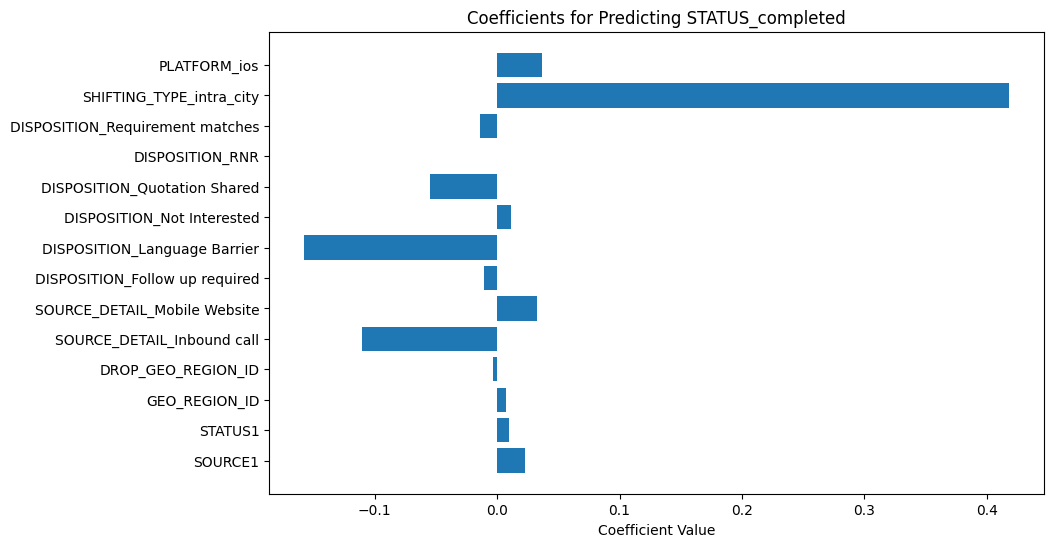

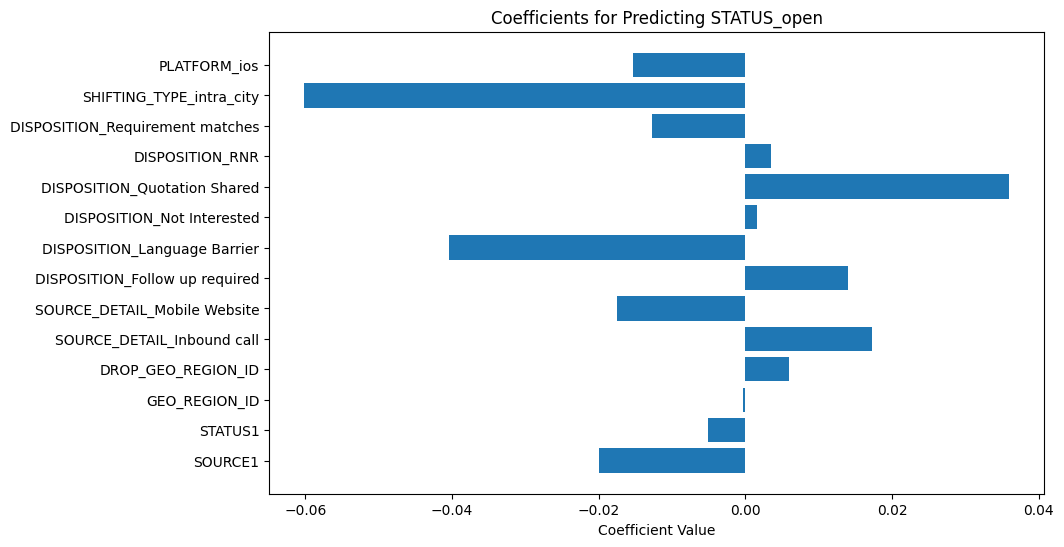

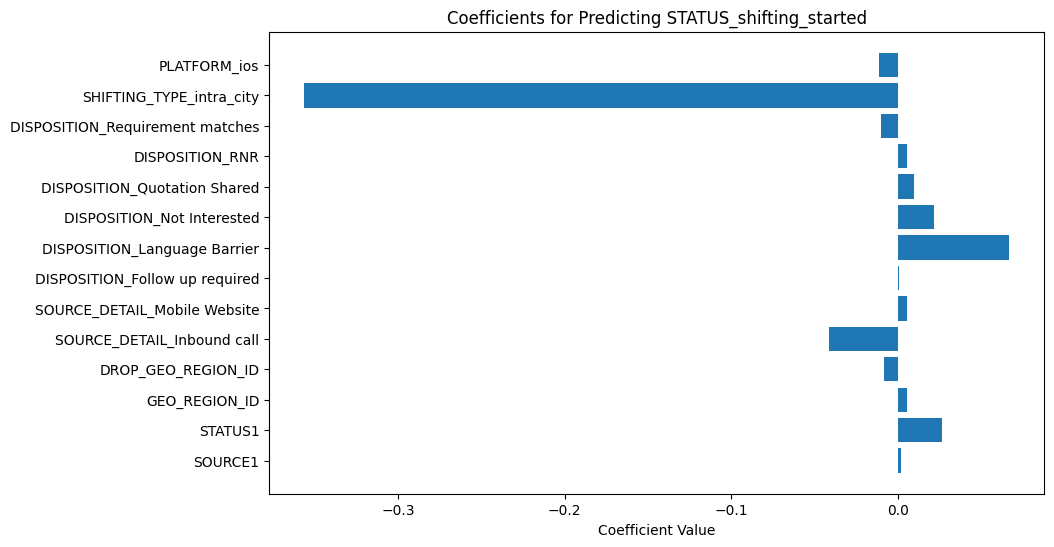

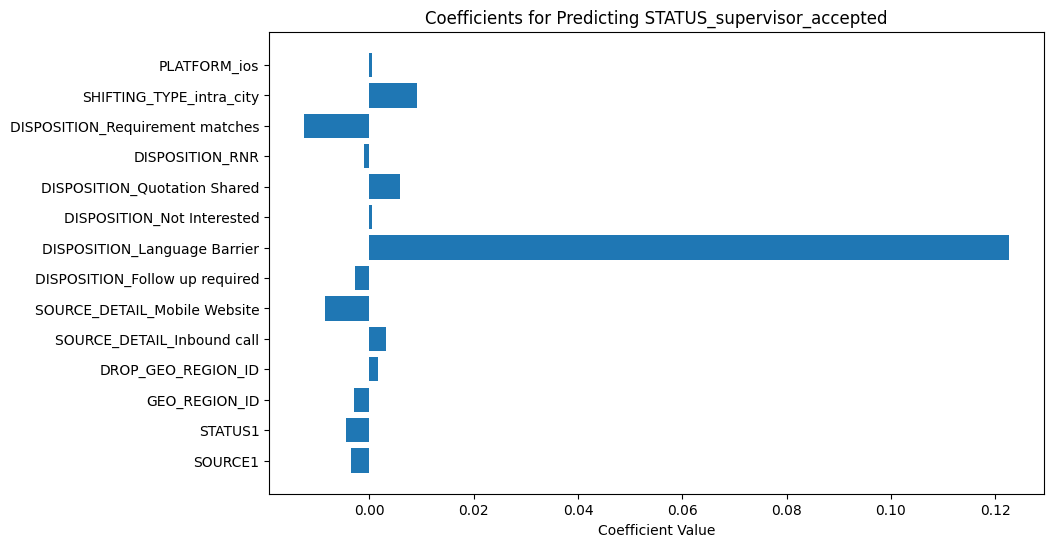

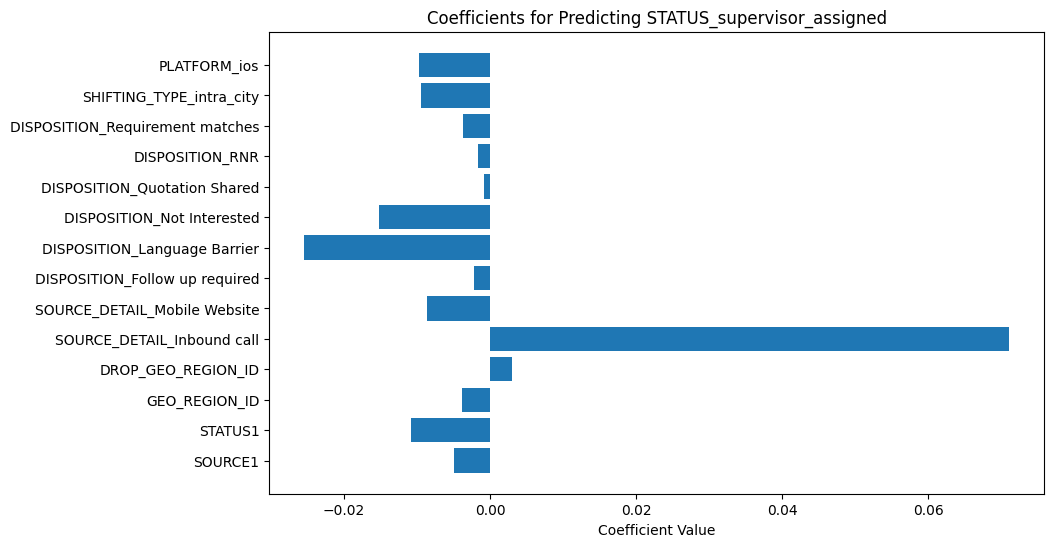

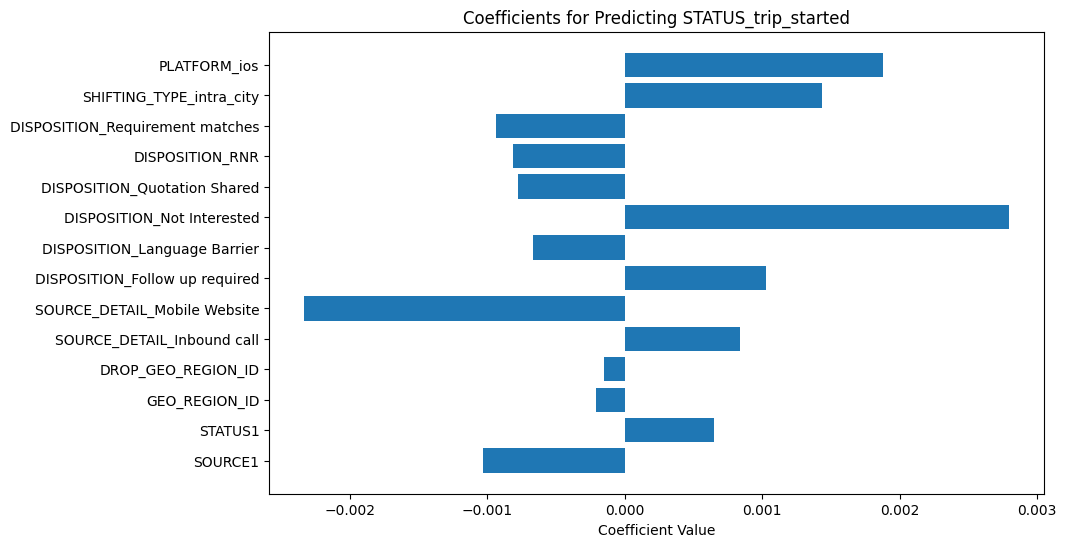

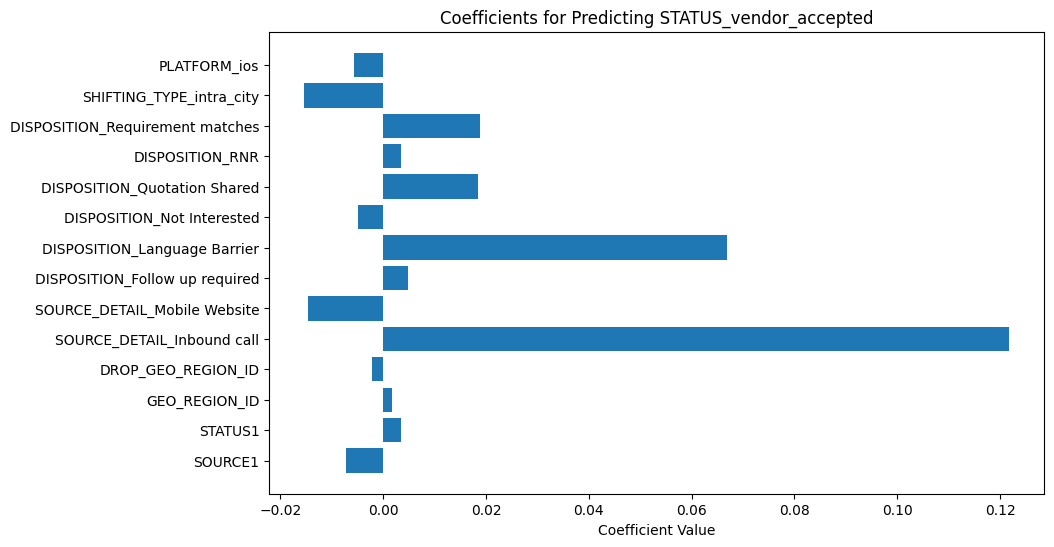

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = 'C:/Users/Venner/Desktop/spreadsheet.xlsx'

opportunities_df = pd.read_excel(file_path, sheet_name='opportunites')
orders_df = pd.read_excel(file_path, sheet_name='orders')

merged_df = pd.merge(opportunities_df, orders_df, left_on='SR_ID', right_on='SR_ID', how='inner')

columns_to_encode = ['SOURCE1', 'STATUS1', 'GEO_REGION_ID', 'SOURCE_DETAIL', 'DISPOSITION',
                     'SHIFTING_TYPE', 'DROP_GEO_REGION_ID', 'PLATFORM', 'STATUS']

data_encoded_full_df = pd.get_dummies(merged_df[columns_to_encode], drop_first=True)

data_encoded_clean_df = data_encoded_full_df.dropna()

X_full_clean = data_encoded_clean_df.drop(columns=[col for col in data_encoded_clean_df.columns if 'STATUS_' in col])  # Independent variables (excluding status columns)
y_full_clean = data_encoded_clean_df[[col for col in data_encoded_clean_df.columns if 'STATUS_' in col]]  # Encoded status variables (target)

models = {}
for target in y_full_clean.columns:
    model = LinearRegression()
    model.fit(X_full_clean, y_full_clean[target])
    models[target] = (model.coef_, X_full_clean.columns)

for target, (coefficients, features) in models.items():
    plt.figure(figsize=(10, 6))
    plt.barh(features, coefficients)
    plt.xlabel('Coefficient Value')
    plt.title(f'Coefficients for Predicting {target}')
    plt.show()
